In [1]:
# required for inlining images
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

import nltk
print(nltk.__version__)

from nltk.tokenize import *
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from IPython.display import HTML # inline display of foreign HTML

3.4.5


In [2]:
# read whole file -- don't do this for big files
f = open('clean')
titles = f.read() # also we never close f -- bad

In [3]:
word_tokenize(titles)[:7]

['MI5', "'secretly", 'collected', 'phone', 'data', "'", 'for']

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(titles.lower())
print(len(words))
print(words[:7])

1620
['mi5', 'secretly', 'collected', 'phone', 'data', 'for', 'decade']


In [5]:
filtered_words = [word for word in words if word not in stopwords.words('english')]
print(stopwords.words('english')[:10])
print(len(filtered_words))
print(filtered_words[:7])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
1174
['mi5', 'secretly', 'collected', 'phone', 'data', 'decade', 'grsecurity']


In [6]:
porter = PorterStemmer()
wordnet = WordNetLemmatizer()

stem_list = []
lemma_list = []
for w in filtered_words:
    stem_list.append(porter.stem(w))
    lemma_list.append(wordnet.lemmatize(w))
print(len(set(stem_list)), " ", len(set(lemma_list)))

853   893


In [7]:
print(wordnet.lemmatize('are'))
print(wordnet.lemmatize('is'))
print(wordnet.lemmatize('are', 'v'))
print(wordnet.lemmatize('is', 'v'))

are
is
be
be


In [8]:
text = word_tokenize("Jean-Paul drives a black car")
nltk.pos_tag(text)

[('Jean-Paul', 'NNP'),
 ('drives', 'VBZ'),
 ('a', 'DT'),
 ('black', 'JJ'),
 ('car', 'NN')]

In [9]:
HTML('https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html')

Number,Tag,Description
1.,CC,Coordinating conjunction
2.,CD,Cardinal number
3.,DT,Determiner
4.,EX,Existential there
5.,FW,Foreign word
6.,IN,Preposition or subordinating conjunction
7.,JJ,Adjective
8.,JJR,"Adjective, comparative"
9.,JJS,"Adjective, superlative"
10.,LS,List item marker


In [10]:
fdist = FreqDist(stem_list)
fdist

FreqDist({'show': 10, 'hn': 10, 'data': 7, 'open': 7, 'sourc': 7, 'new': 7, 'let': 6, 'help': 6, 'releas': 6, '2': 6, ...})

In [11]:
d = {k: v for k, v in fdist.items() if v > 3}
d

{'data': 7,
 'develop': 5,
 'state': 4,
 'linux': 4,
 'framework': 4,
 'googl': 4,
 'open': 7,
 'sourc': 7,
 'year': 4,
 'human': 4,
 'let': 6,
 'help': 6,
 'show': 10,
 'hn': 10,
 'engin': 5,
 'use': 5,
 'releas': 6,
 'u': 4,
 'code': 5,
 'app': 5,
 'work': 5,
 'big': 5,
 '2': 6,
 'c': 4,
 'new': 7,
 '1': 5,
 'manag': 4,
 'distribut': 4,
 'set': 4,
 'gener': 4,
 'machin': 4,
 'learn': 4}

(2, 11)

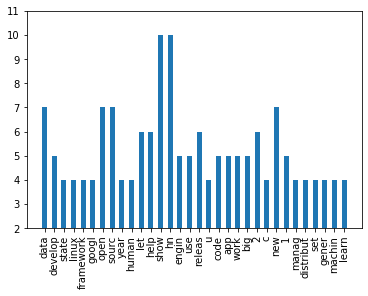

In [12]:
X = np.arange(len(d))
Y = list(d.values()) # d.values returns an instance of dict_values which you cannot use for anything much
plt.bar(X, Y, align='center', width=0.5)
plt.xticks(X, d.keys(), rotation='vertical')
ymax = max(Y) + 1
plt.ylim(2, ymax)

In [18]:
import pandas as pd
df = pd.DataFrame({'x':[0,1,np.nan,np.nan,3,np.nan,6]})
df.count()
df['xi'] = df.x.interpolate() # a cool trick

In [19]:
print(df['xi'])

0    0.000000
1    1.000000
2    1.666667
3    2.333333
4    3.000000
5    4.500000
6    6.000000
Name: xi, dtype: float64


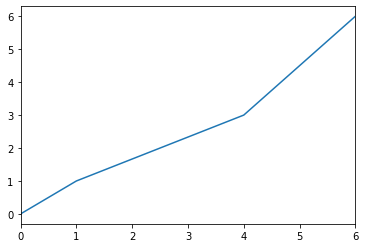

In [21]:
df['xi'].plot()
